# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [73]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [75]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [76]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = soup(html, 'html.parser')


In [77]:
# Extract all rows of data
mars_data = mars_soup.find_all('tr', class_='data-row')
# print results
mars_data

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [78]:
# Create an empty list
mars_list_table_data = []
# Loop through the scraped data to create a list of rows
for row in mars_data:
    # extract list of tds
    row_data = row.select('td')
    # create a row data list
    row_data_list = []
    #loop through data_of_list and append to row_data_list 
    for td in row_data: 
    # append data to the list
     row_data_list.append(td.text)
    # append row_data_list to mars_list_table_data 
    mars_list_table_data.append(row_data_list )
    
    

In [79]:

# Create a Pandas DataFrame by using the list of rows and a list of the column names
data = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_list_df = pd.DataFrame(mars_list_table_data, columns = data)

In [80]:
# Confirm DataFrame was created successfully
mars_list_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [81]:
# Examine data type of each column
mars_list_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [82]:
# Change data types for data analysis
mars_list_df = mars_list_df.astype({
    "id": object,
    "terrestrial_date": "datetime64[ns]",
    "sol": int,
    "ls": int,
    "month": int,
    "min_temp": float,
    "pressure": float   
})

In [83]:
# Confirm type changes were successful by examining data types again
mars_list_df.dtypes 

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [84]:
# 1. How many months are there on Mars?
total_months = mars_list_df['month'].nunique()
print(total_months)

12


In [85]:
# 2. How many sols (Martian days) worth of data are there?
mars_list_df['sol'].nunique()

1867

In [86]:
# 3. What is the average minimum temperature by month?
mars_avg_min_temp = mars_list_df.groupby('month').min_temp.agg('mean')
mars_avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

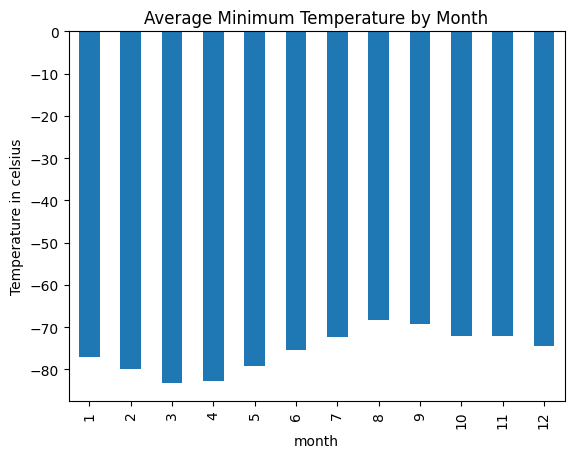

In [87]:
# Plot the average minimum temperature by month
mars_avg_min_temp.plot.bar()
plt.xlabel('month')
plt.ylabel('Temperature in celsius')
plt.title('Average Minimum Temperature by Month')
plt.show()




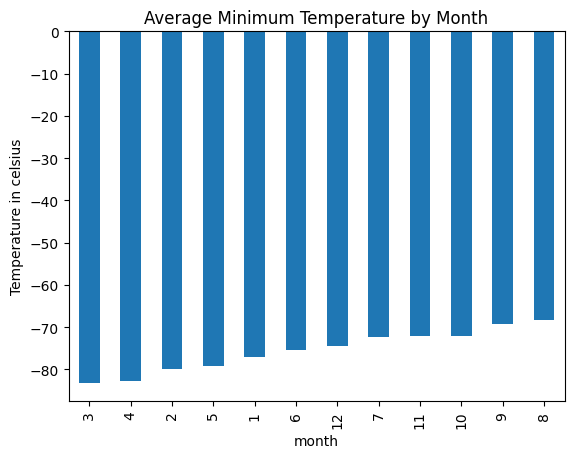

In [88]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
mars_avg_min_temp = mars_avg_min_temp.sort_values()
mars_avg_min_temp
mars_avg_min_temp.plot.bar()
plt.xlabel('month')
plt.ylabel('Temperature in celsius')
plt.title('Average Minimum Temperature by Month')
plt.show()

In [89]:
# 4. What is the average pressure by month?
mars_avg_pressure = mars_list_df.groupby('month').pressure.agg('mean')
mars_avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

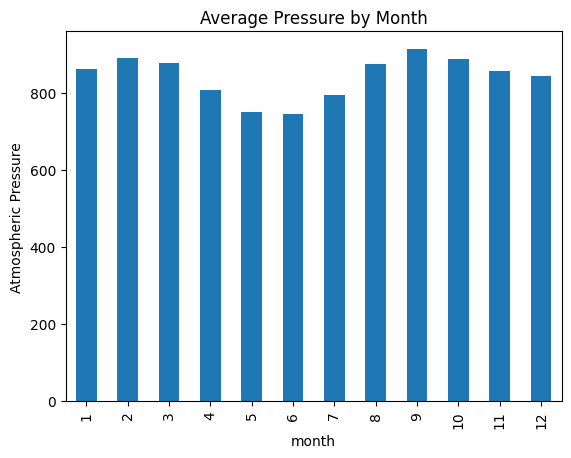

In [90]:
# Plot the average pressure by month
mars_avg_pressure.plot.bar()
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Month')
plt.show()

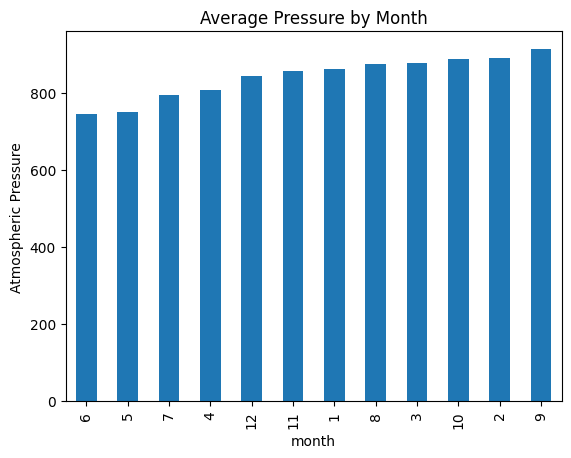

In [91]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
mars_avg_pressure = mars_avg_pressure.sort_values()
mars_avg_pressure.plot.bar()
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Month')
plt.show()

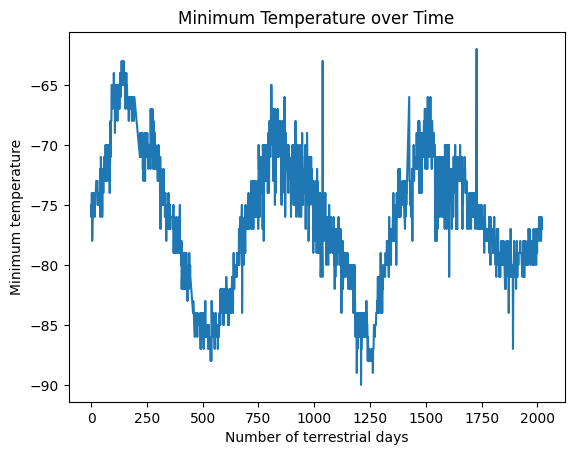

In [119]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

terra_day = mars_list_df['terrestrial_date'].min()
terra_days_min_temperature_df = pd.DataFrame({
    "min_temp": mars_list_df['min_temp'],
    "terra_days": (mars_list_df['terrestrial_date'] - terra_day).dt.days
})

#terra_days_min_temperature_df = terra_days_min_temperature_df[terra_days_min_temperature_df['terra_days'] <= 1750]
terra_days_min_temperature_df = terra_days_min_temperature_df.sort_values(by='terra_days')

plt.plot(terra_days_min_temperature_df['terra_days'], terra_days_min_temperature_df["min_temp"])
plt.xlabel('Number of terrestrial days')

plt.ylabel('Minimum temperature')
plt.title('Minimum Temperature over Time')

plt.show()



#### Minimum Temperature
Based on the above result, it appears that the third month experiences the coldest minimum temperatures on Mars, while the eighth month is typically the warmest. However, temperatures remain extremely cold throughout the year.

#### Atmospheric Pressure

Atmospheric Pressure is generally lowest in the sixth month and highest in the ninth.

#### Year Length

The distance between peaks is roughly 1490 to 800 days, indicating that a Martian year is approximately 690 Earth days based on the plot. However, an internet search reveals that a Martian year is actually 687 Earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [121]:
# Write the data to a CSV
mars_list_df.to_csv('mars_weather_data.csv', header=True, index=False, date_format= '%y-%m-%d')

In [122]:
browser.quit()